In [1]:
import tensorflow_probability as tfp
import inferpy as inf

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.reset_default_graph()

d = 2
N = 2000

In [3]:
## P model definition: model + log_prob function

@inf.probmodel
def logregression(d, N, w_init=(1, 1), x_init=(0, 1)):


    w = inf.Normal(loc=np.ones(d) * w_init[0], scale=1. * w_init[1], name="w")
    w0 = inf.Normal(loc= 1.* w_init[0], scale=1. * w_init[1], name="w0")

    with inf.datamodel():
        x = inf.Normal(loc=np.ones(d) * x_init[0], scale=1. * x_init[1], name="x")
        y = inf.Bernoulli(logits =  tf.tensordot(x,w, axes=[[1],[0]]) + w0, name="y")

In [4]:
w_sampling = [2, 1]
w0_sampling = 0

m = logregression(d, N, x_init=(2,10))

training = m.prior(['x', 'y'], data={"w0": w0_sampling, "w": w_sampling}, size_datamodel=N).sample()
x_train = training['x']
y_train = training['y']

W0114 11:29:50.989405 4685911488 deprecation_wrapper.py:119] From /Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/models/prob_model.py:63: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0114 11:29:51.008085 4685911488 deprecation_wrapper.py:119] From /Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/util/interceptor.py:142: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.

W0114 11:29:51.049604 4685911488 deprecation_wrapper.py:119] From /Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/util/tf_graph.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0114 11:29:51.554225 4685911488 deprecation_wrapper.py:119] From /Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/util/session.py:53: The name tf.report_uninitialized_variables is deprecated. Please use tf.compat.v1.report_uninitialized_variables instead.


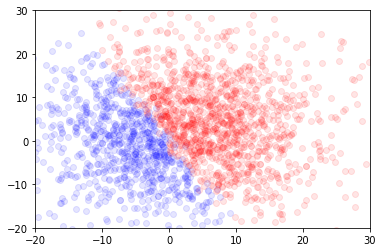

In [5]:
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1], color='blue', alpha=0.1)
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1], color='red', alpha=0.1)

plt.axis([-20, 30, -20, 30])
plt.show()

In [8]:
num_samples = 500

mcmc = inf.inference.MCMC()
m.fit(training, mcmc)

print(mcmc.states)

/Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/models/prob_model.py:187: UserWarning: Fit was called before. This will restart the inference method and                 re-build the expanded model.
  re-build the expanded model.")
/Users/rcabanas/venv/InferPy/lib/python3.6/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


{'w': <inf.RandomVariable (Empirical distribution) named w_17/, shape=(2,), dtype=float32>, 'w0': <inf.RandomVariable (Empirical distribution) named w0_17/, shape=(), dtype=float32>}


/Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/contextmanager/randvar_registry.py:52: UserWarning: The variable w was already defined in the default random variable registry,                 and is going to be removed. 
  and is going to be removed. ".format(rv.name))
/Users/rcabanas/GoogleDrive/UAL/inferpy/repo/InferPy/inferpy/contextmanager/randvar_registry.py:52: UserWarning: The variable w0 was already defined in the default random variable registry,                 and is going to be removed. 
  and is going to be removed. ".format(rv.name))


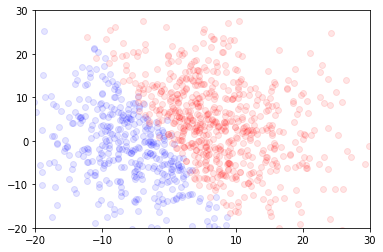

In [9]:
testing = m.posterior_predictive(['x', 'y']).sample(1000)

x_gen = testing['x']
y_gen = testing['y']

plt.scatter(x_gen[y_gen==0,0], x_gen[y_gen==0,1], color='blue', alpha=0.1)
plt.scatter(x_gen[y_gen==1,0], x_gen[y_gen==1,1], color='red', alpha=0.1)

plt.axis([-20, 30, -20, 30])
plt.show()